In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import validation_curve, cross_val_score, learning_curve, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from src.plot_analysis import *
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score



# Compare Results with Ridge and Lasso

In [2]:
# load data
dat = np.load("data.npz",allow_pickle=True)
values = dat["arr_0"]
header = dat["arr_1"]
dt = pd.DataFrame(values,columns = header)
# load features
fs_features = np.load("top_col.npz",allow_pickle=True)
fs_features = fs_features["arr_0"]
features = fs_features[0:10]

top15 = np.load("top_col_15.npz",allow_pickle=True)
top15 = top15["arr_0"]


mi_series = pd.read_pickle("./mutual.pkl")
mutual_info_features = np.array(mi_series.index)

# Ridge and Lasso

In [140]:
X = dt[mutual_info_features].values
y = dt["loan_status"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Lasso

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


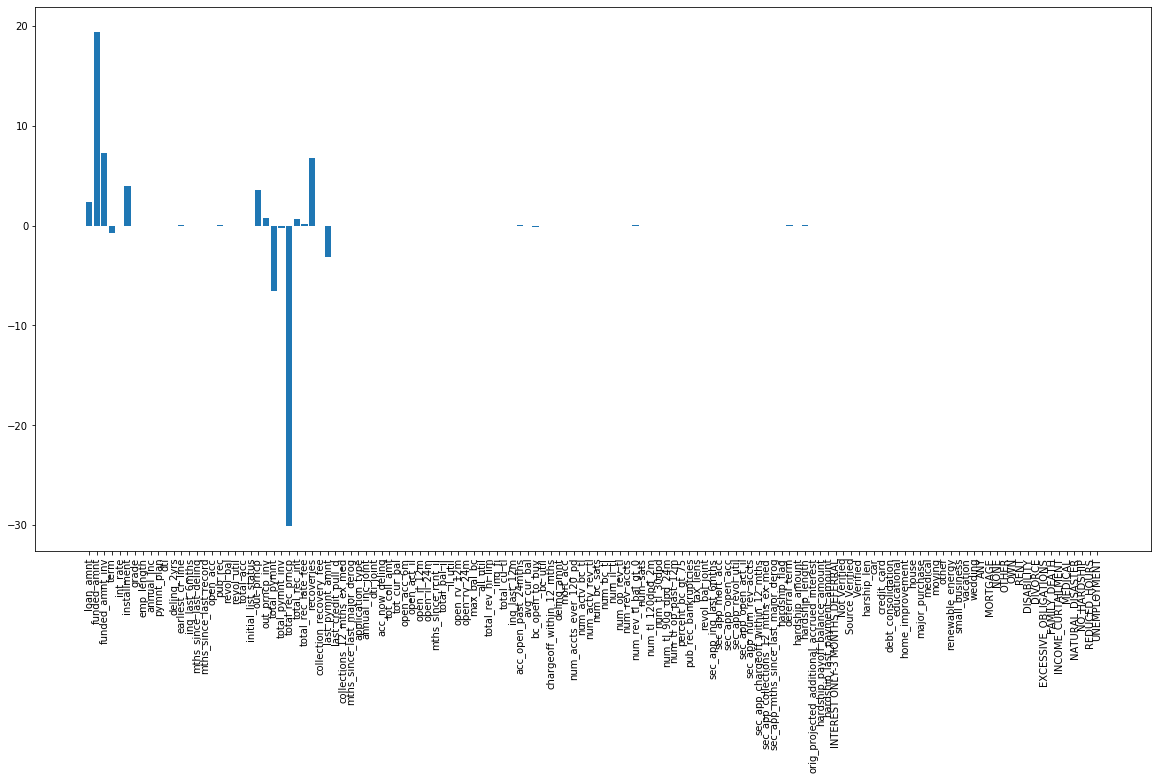

In [187]:
logisticRegr = LogisticRegression(penalty='l1', C=0.01 ,random_state=3)
logisticRegr.fit(X_train, y_train)
train_score=logisticRegr.score(X_train, y_train)
test_score=logisticRegr.score(X_test, y_test)

plt.figure(figsize=(20,10))
x = np.arange(1,len(logisticRegr.coef_[0])+1)
plt.bar(x,(logisticRegr.coef_[0]))
my_xticks = mutual_info_features
plt.xticks(x, my_xticks, rotation=90)
plt.show()

In [188]:
l1, l1_feat = zip(*sorted(zip(abs(logisticRegr.coef_[0]), mutual_info_features)))
print(l1[-16:-1])
print(l1_feat[-16:-1])

(0.09116747639784069, 0.0951128526245668, 0.19345812467058388, 0.2075710981372239, 0.624579942709254, 0.7652700560053851, 0.8040139463968469, 2.4083443142937475, 3.129241299216179, 3.5361061746093245, 3.996048272600218, 6.538642596962253, 6.743790678637777, 7.259905654753845, 19.450698663350234)
('bc_open_to_buy', 'num_rev_tl_bal_gt_0', 'total_rec_late_fee', 'total_pymnt_inv', 'total_rec_int', 'term', 'out_prncp_inv', 'loan_amnt', 'last_pymnt_amnt', 'out_prncp', 'installment', 'total_pymnt', 'recoveries', 'funded_amnt_inv', 'funded_amnt')


### Ridge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


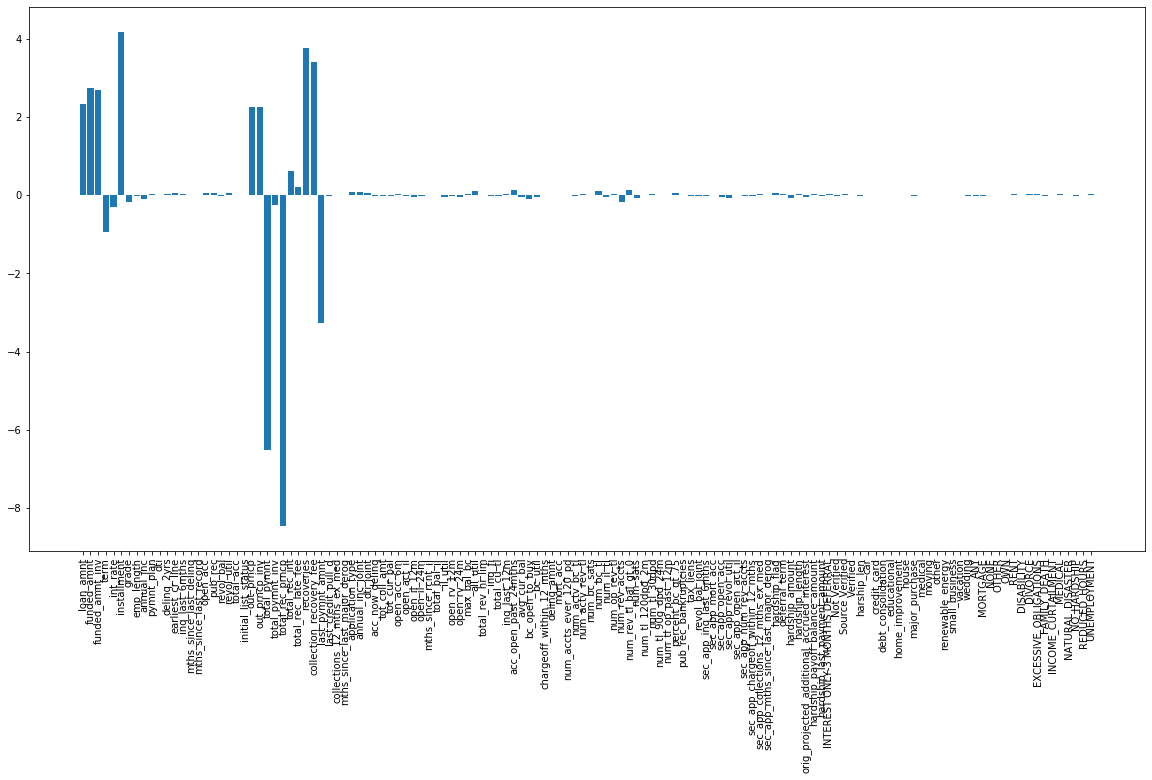

In [189]:
logisticRegr = LogisticRegression(penalty='l2', C=0.01 ,random_state=3)
logisticRegr.fit(X_train, y_train)
train_score=logisticRegr.score(X_train, y_train)
test_score=logisticRegr.score(X_test, y_test)

plt.figure(figsize=(20,10))
x = np.arange(1,len(logisticRegr.coef_[0])+1)
plt.bar(x,(logisticRegr.coef_[0]))
my_xticks = mutual_info_features
plt.xticks(x, my_xticks, rotation=90)
plt.show()

In [190]:
l2, l2_feat = zip(*sorted(zip(abs(logisticRegr.coef_[0]), mutual_info_features)))
print(l2[-16:-1])
print(l2_feat[-16:-1])

(0.21462391725599045, 0.25132014455202, 0.29104642914483037, 0.6136664967489505, 0.9332508050294914, 2.2536854609353103, 2.2548173207231184, 2.3219464112531436, 2.682894463402402, 2.7537031156472556, 3.2804544438198504, 3.4089109503205464, 3.7697072042840856, 4.1825642207524, 6.510591463869809)
('total_rec_late_fee', 'total_pymnt_inv', 'int_rate', 'total_rec_int', 'term', 'out_prncp_inv', 'out_prncp', 'loan_amnt', 'funded_amnt_inv', 'funded_amnt', 'last_pymnt_amnt', 'collection_recovery_fee', 'recoveries', 'installment', 'total_pymnt')


## Compare results from Ridge, Lasso and Mutual Information (+ Forward Search)

In [201]:
l2_feat[-16:-1]

('total_rec_late_fee',
 'total_pymnt_inv',
 'int_rate',
 'total_rec_int',
 'term',
 'out_prncp_inv',
 'out_prncp',
 'loan_amnt',
 'funded_amnt_inv',
 'funded_amnt',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'recoveries',
 'installment',
 'total_pymnt')

In [202]:
l1_feat[-16:-1]

('bc_open_to_buy',
 'num_rev_tl_bal_gt_0',
 'total_rec_late_fee',
 'total_pymnt_inv',
 'total_rec_int',
 'term',
 'out_prncp_inv',
 'loan_amnt',
 'last_pymnt_amnt',
 'out_prncp',
 'installment',
 'total_pymnt',
 'recoveries',
 'funded_amnt_inv',
 'funded_amnt')

In [26]:
tuple(top15[::-1])

('NO_HARDSHIP',
 'MORTGAGE',
 'Source Verified',
 'last_credit_pull_d',
 'collection_recovery_fee',
 'recoveries',
 'total_rec_late_fee',
 'total_pymnt_inv',
 'total_pymnt',
 'out_prncp',
 'mths_since_last_delinq',
 'grade',
 'installment',
 'int_rate',
 'term')

# Logit

In [3]:
# split data into training and test
X =dt[features].values
y =dt["loan_status"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4]:
logisticRegr = LogisticRegression(random_state = 3)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

print("F1: " + str(metrics.f1_score(y_test, predictions)))
print("Accuracy: " + str(metrics.accuracy_score(y_test, predictions)))
print("Precision: " + str(metrics.precision_score(y_test, predictions)))
print("Recall: " + str(metrics.recall_score(y_test, predictions)))
print("ROC: " + str(metrics.roc_auc_score(y_test, predictions)))
print("MSE: " + str(metrics.mean_squared_error(y_test, predictions)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1: 0.9448280729822249
Accuracy: 0.9766835449960352
Precision: 0.9922539039335837
Recall: 0.9017289772089367
ROC: 0.949863597859595
MSE: 0.02331645500396479


In [5]:
len_axis = np.linspace(.01, 1.0, 7)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[learning_curve] Training set sizes: [  12068  211202  410336  609469  808603 1007737 1206871]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  70 | elapsed:  2.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  4.4min finished
No handles with labels found to put in legend.


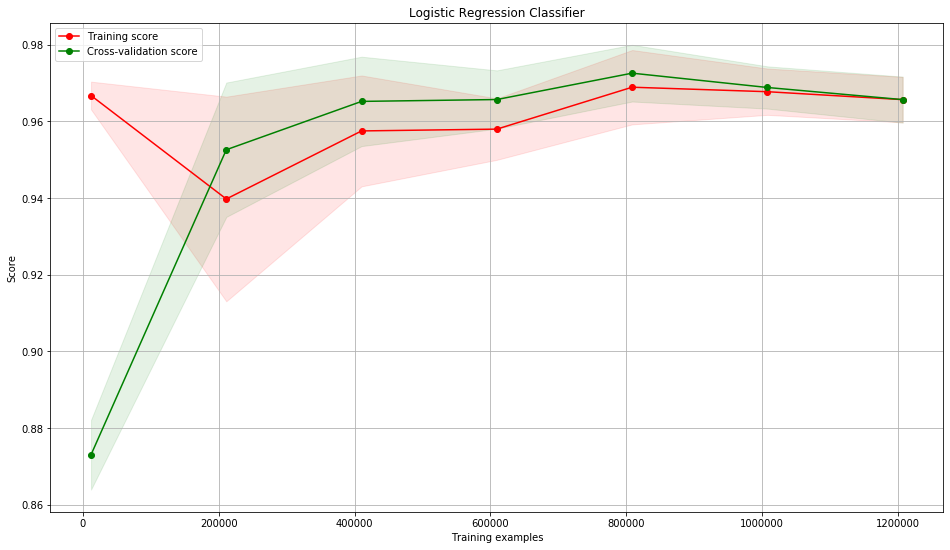

In [6]:
plot_curve(X,y,LogisticRegression(),len_axis)